In [1]:
# used car price prediction
# weather prediction
# tour package prediction (yaatra)

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
sns.set_style('whitegrid')

In [3]:
df=pd.read_csv('used_cars_data.csv',index_col=0)

In [4]:
df.head(3)

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
S.No.,,,,,,,,,,,,,
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50


In [5]:
df.describe(include='all')

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
count,7253,7253,7253.000000,7.253000e+03,7253,7253,7253,7251,7207,7207,7200.000000,1006,6019.000000
unique,2041,11,NaN,NaN,5,2,4,450,150,386,NaN,625,NaN
top,Mahindra XUV500 W8 2WD,Mumbai,NaN,NaN,Diesel,Manual,First,17.0 kmpl,1197 CC,74 bhp,NaN,63.71 Lakh,NaN
freq,55,949,NaN,NaN,3852,5204,5952,207,732,280,NaN,6,NaN
mean,NaN,NaN,2013.365366,5.869906e+04,NaN,NaN,NaN,NaN,NaN,NaN,5.279722,NaN,9.479468
std,NaN,NaN,3.254421,8.442772e+04,NaN,NaN,NaN,NaN,NaN,NaN,0.811660,NaN,11.187917
min,NaN,NaN,1996.000000,1.710000e+02,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,0.440000
25%,NaN,NaN,2011.000000,3.400000e+04,NaN,NaN,NaN,NaN,NaN,NaN,5.000000,NaN,3.500000
50%,NaN,NaN,2014.000000,5.341600e+04,NaN,NaN,NaN,NaN,NaN,NaN,5.000000,NaN,5.640000
75%,NaN,NaN,2016.000000,7.300000e+04,NaN,NaN,NaN,NaN,NaN,NaN,5.000000,NaN,9.950000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7253 entries, 0 to 7252
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               7253 non-null   object 
 1   Location           7253 non-null   object 
 2   Year               7253 non-null   int64  
 3   Kilometers_Driven  7253 non-null   int64  
 4   Fuel_Type          7253 non-null   object 
 5   Transmission       7253 non-null   object 
 6   Owner_Type         7253 non-null   object 
 7   Mileage            7251 non-null   object 
 8   Engine             7207 non-null   object 
 9   Power              7207 non-null   object 
 10  Seats              7200 non-null   float64
 11  New_Price          1006 non-null   object 
 12  Price              6019 non-null   float64
dtypes: float64(2), int64(2), object(9)
memory usage: 793.3+ KB


In [7]:
df.columns

Index(['Name', 'Location', 'Year', 'Kilometers_Driven', 'Fuel_Type',
       'Transmission', 'Owner_Type', 'Mileage', 'Engine', 'Power', 'Seats',
       'New_Price', 'Price'],
      dtype='object')

In [8]:
for col in df.columns:
    print(f'{col}:{df[col].nunique()}')
    print(df[col].unique())
    print('-'*20)

Name:2041
['Maruti Wagon R LXI CNG' 'Hyundai Creta 1.6 CRDi SX Option'
 'Honda Jazz V' ... 'Ford EcoSport 1.5 Petrol Ambiente'
 'Jeep Compass 1.4 Sport' 'Hyundai Elite i20 Magna Plus']
--------------------
Location:11
['Mumbai' 'Pune' 'Chennai' 'Coimbatore' 'Hyderabad' 'Jaipur' 'Kochi'
 'Kolkata' 'Delhi' 'Bangalore' 'Ahmedabad']
--------------------
Year:23
[2010 2015 2011 2012 2013 2016 2018 2014 2017 2007 2009 2008 2019 2006
 2005 2004 2002 2000 2003 1999 2001 1998 1996]
--------------------
Kilometers_Driven:3660
[72000 41000 46000 ... 89411 52262 72443]
--------------------
Fuel_Type:5
['CNG' 'Diesel' 'Petrol' 'LPG' 'Electric']
--------------------
Transmission:2
['Manual' 'Automatic']
--------------------
Owner_Type:4
['First' 'Second' 'Fourth & Above' 'Third']
--------------------
Mileage:450
['26.6 km/kg' '19.67 kmpl' '18.2 kmpl' '20.77 kmpl' '15.2 kmpl'
 '21.1 km/kg' '23.08 kmpl' '11.36 kmpl' '20.54 kmpl' '22.3 kmpl'
 '21.56 kmpl' '16.8 kmpl' '25.2 kmpl' '12.7 kmpl' '0.0 kmpl' 

In [22]:
df['Name'].str.lower().str.split().str.get(0).value_counts()

maruti           1444
hyundai          1340
honda             743
toyota            507
mercedes-benz     380
volkswagen        374
ford              351
mahindra          331
bmw               312
audi              285
tata              228
skoda             202
renault           170
chevrolet         151
nissan            117
land               67
jaguar             48
fiat               38
mitsubishi         36
mini               31
volvo              28
porsche            19
jeep               19
datsun             17
isuzu               5
force               3
bentley             2
smart               1
ambassador          1
lamborghini         1
hindustan           1
opelcorsa           1
Name: Name, dtype: int64

In [9]:
target_col = 'Price'
cat_cols = ['Location','Year','Fuel_Type','Transmission','Owner_Type']
num_cols = ['Kilometers_Driven','Mileage','Engine','Power','Seats']
drop_cols = ['New_Price']

Location
Ahmedabad     275
Bangalore     440
Chennai       591
Coimbatore    772
Delhi         660
Hyderabad     876
Jaipur        499
Kochi         772
Kolkata       654
Mumbai        949
Pune          765
Name: Location, dtype: int64


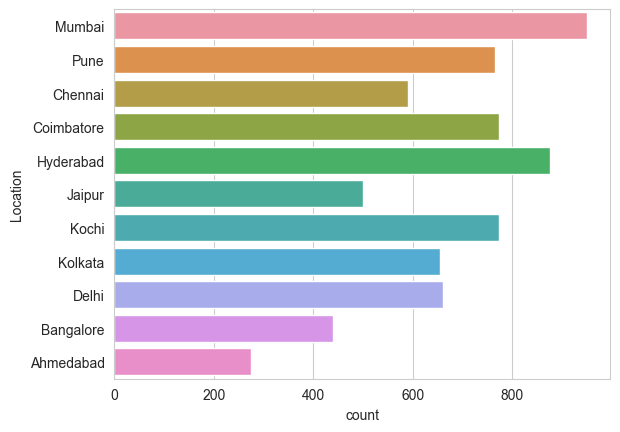

Year
1996      1
1998      4
1999      2
2000      5
2001      8
2002     18
2003     20
2004     35
2005     68
2006     89
2007    148
2008    207
2009    252
2010    407
2011    579
2012    690
2013    791
2014    925
2015    929
2016    886
2017    709
2018    361
2019    119
Name: Year, dtype: int64


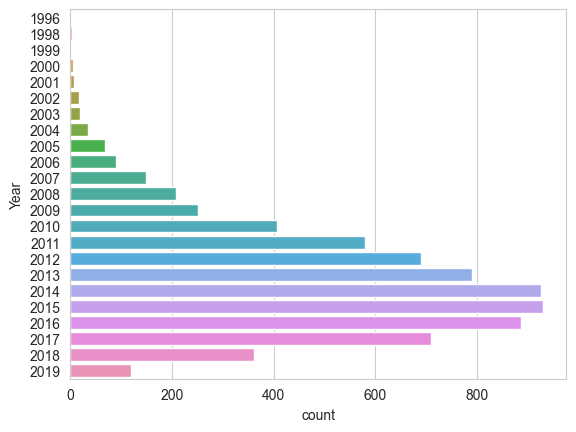

Fuel_Type
CNG           62
Diesel      3852
Electric       2
LPG           12
Petrol      3325
Name: Fuel_Type, dtype: int64


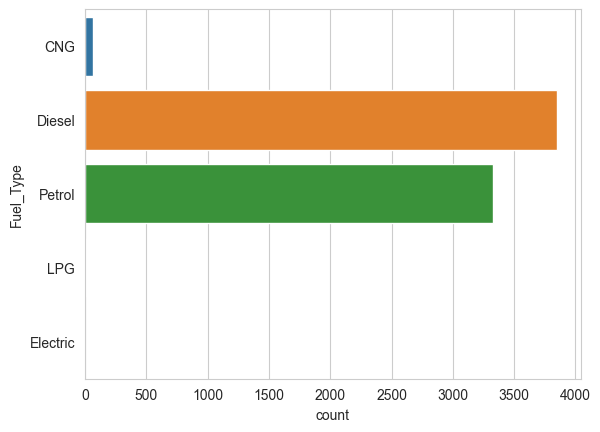

Transmission
Automatic    2049
Manual       5204
Name: Transmission, dtype: int64


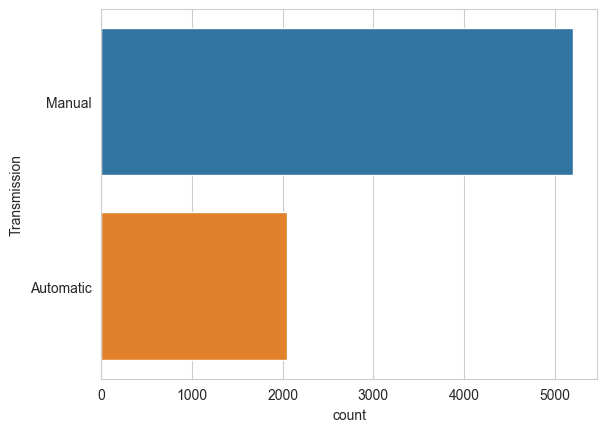

Owner_Type
First             5952
Fourth & Above      12
Second            1152
Third              137
Name: Owner_Type, dtype: int64


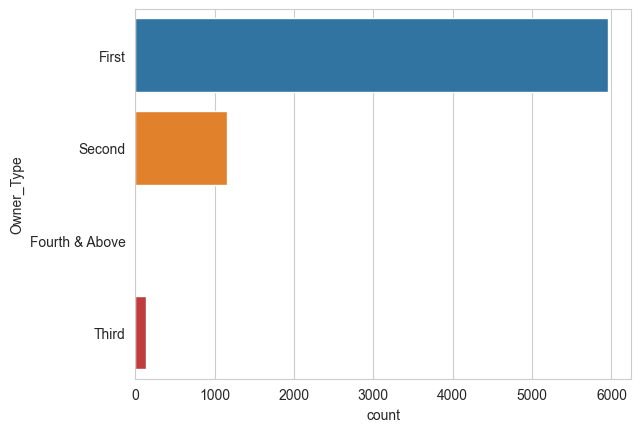

In [23]:
def cat_analyze(col):
    print(col)
    print(df[col].value_counts().sort_index())
    sns.countplot(data=df,y=col)
    plt.show()

for col in cat_cols:
    cat_analyze(col)

In [11]:
df['Mileage'].head()

S.No.
0    26.6 km/kg
1    19.67 kmpl
2     18.2 kmpl
3    20.77 kmpl
4     15.2 kmpl
Name: Mileage, dtype: object

In [12]:
Mileage=df['Mileage'].str.split().str.get(0)
Mileage.sample(5)

S.No.
749       0.0
413     21.76
1117     20.7
3489    17.85
3951     22.7
Name: Mileage, dtype: object

In [13]:
pd.isnull(Mileage).sum()

2

In [14]:
# missing data
100*pd.isnull(df).sum()/len(df)


Name                  0.000000
Location              0.000000
Year                  0.000000
Kilometers_Driven     0.000000
Fuel_Type             0.000000
Transmission          0.000000
Owner_Type            0.000000
Mileage               0.027575
Engine                0.634220
Power                 0.634220
Seats                 0.730732
New_Price            86.129877
Price                17.013650
dtype: float64

In [15]:
df.drop(drop_cols,axis=1,inplace=True)

In [16]:
100*pd.isnull(df).sum()/len(df)


Name                  0.000000
Location              0.000000
Year                  0.000000
Kilometers_Driven     0.000000
Fuel_Type             0.000000
Transmission          0.000000
Owner_Type            0.000000
Mileage               0.027575
Engine                0.634220
Power                 0.634220
Seats                 0.730732
Price                17.013650
dtype: float64

In [24]:
# Drop the Missing Entries

df0 = df.dropna()
df1 = df.dropna(thresh = 11)


In [25]:
df.shape,df1.shape,df0.shape

((7253, 12), (7206, 12), (5975, 12))

for exmaple we have total 12 columns, so it will keep only those rows, which at least have 11 number of entries to be non-null

In [26]:
100*pd.isnull(df0).sum()/len(df)

Name                 0.0
Location             0.0
Year                 0.0
Kilometers_Driven    0.0
Fuel_Type            0.0
Transmission         0.0
Owner_Type           0.0
Mileage              0.0
Engine               0.0
Power                0.0
Seats                0.0
Price                0.0
dtype: float64

In [27]:
100*pd.isnull(df1).sum()/len(df)

Name                  0.000000
Location              0.000000
Year                  0.000000
Kilometers_Driven     0.000000
Fuel_Type             0.000000
Transmission          0.000000
Owner_Type            0.000000
Mileage               0.027575
Engine                0.000000
Power                 0.000000
Seats                 0.082724
Price                16.861988
dtype: float64

In [28]:
cars = df[~pd.isnull(df['Price'])]

In [29]:
100*pd.isnull(cars).sum()/len(cars)

Name                 0.000000
Location             0.000000
Year                 0.000000
Kilometers_Driven    0.000000
Fuel_Type            0.000000
Transmission         0.000000
Owner_Type           0.000000
Mileage              0.033228
Engine               0.598106
Power                0.598106
Seats                0.697790
Price                0.000000
dtype: float64

In [30]:
# Treating the power data first
df['Power']=df['Power'].apply(lambda x: np.nan if pd.isnull(x) else (np.nan if 'null' in x.lower() else x))
# The only method has to be used here REMOVE ALL THE MISSING ENTRIES
cars = df.dropna()

In [31]:
100*pd.isnull(cars).sum()/len(cars)

Name                 0.0
Location             0.0
Year                 0.0
Kilometers_Driven    0.0
Fuel_Type            0.0
Transmission         0.0
Owner_Type           0.0
Mileage              0.0
Engine               0.0
Power                0.0
Seats                0.0
Price                0.0
dtype: float64

In [32]:
cars.shape
(5872, 12)
cars.columns

Index(['Name', 'Location', 'Year', 'Kilometers_Driven', 'Fuel_Type',
       'Transmission', 'Owner_Type', 'Mileage', 'Engine', 'Power', 'Seats',
       'Price'],
      dtype='object')

In [33]:
cars['Mileage'] = cars['Mileage'].str.split().str.get(0).astype(float)
#cars['Mileage'].apply(lambda x: eval(x.split()[0]))

cars['Power'] = cars['Power'].str.split().str.get(0).astype(float)

cars['Engine'] = cars['Engine'].str.split().str.get(0).astype(float)

In [35]:
# Outlier Analysis
cars['Price'].max(),cars['Price'].min(),cars['Price'].mean(),cars['Price'].std()

(160.0, 0.44, 9.603918596730246, 11.249453218099008)

In [36]:
# Price Column
#-----------------------------------

q1 = cars['Price'].quantile(0.25)
q2 = cars['Price'].quantile(0.5)
q3 = cars['Price'].quantile(0.75)

iqr = q3-q1

max_lim = q3 + (iqr * 1.5)
#min_lim = q1 - (iqr * 1.5)
min_lim=0 # since price can not be negative
print(q1,q2,q3,max_lim,min_lim)
(cars['Price']>max_lim).sum()

3.5175 5.75 10.0 19.72375 0


712

In [37]:
cars['Price'][cars['Price']>max_lim].sort_values(ascending=False).head(20)

S.No.
4079    160.00
5781    120.00
5919    100.00
1505     97.07
1974     93.67
1984     93.00
4691     90.00
5535     85.00
2095     83.96
1885     79.00
2422     79.00
2319     78.80
2907     75.00
655      75.00
3489     75.00
2659     75.00
1583     72.94
5603     72.00
418      70.99
1690     70.80
Name: Price, dtype: float64

In [38]:
# Putting Arbitrary Condition to remove some extreme outliers(not sure if it helps)
cars = cars[cars['Price']<=100]

In [39]:
# Price Column
#-----------------------------------

q1 = cars['Price'].quantile(0.25)
q2 = cars['Price'].quantile(0.5)
q3 = cars['Price'].quantile(0.75)

iqr = q3-q1

max_lim = q3 + (iqr * 1.5)
#min_lim = q1 - (iqr * 1.5)
min_lim=0 # since price can not be negative
print(q1,q2,q3,max_lim,min_lim)
(cars['Price']>max_lim).sum()

3.5124999999999997 5.75 10.0 19.731250000000003 0


710

In [40]:
# Removing one extreme outlier
cars = cars[cars['Kilometers_Driven']< cars['Kilometers_Driven'].max()]

# EDA - Graphical Analysis

Location
Ahmedabad     275
Bangalore     440
Chennai       591
Coimbatore    772
Delhi         660
Hyderabad     876
Jaipur        499
Kochi         772
Kolkata       654
Mumbai        949
Pune          765
Name: Location, dtype: int64


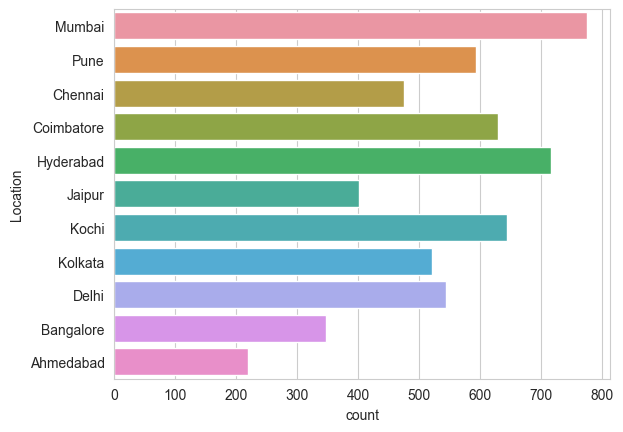

Year
1996      1
1998      4
1999      2
2000      5
2001      8
2002     18
2003     20
2004     35
2005     68
2006     89
2007    148
2008    207
2009    252
2010    407
2011    579
2012    690
2013    791
2014    925
2015    929
2016    886
2017    709
2018    361
2019    119
Name: Year, dtype: int64


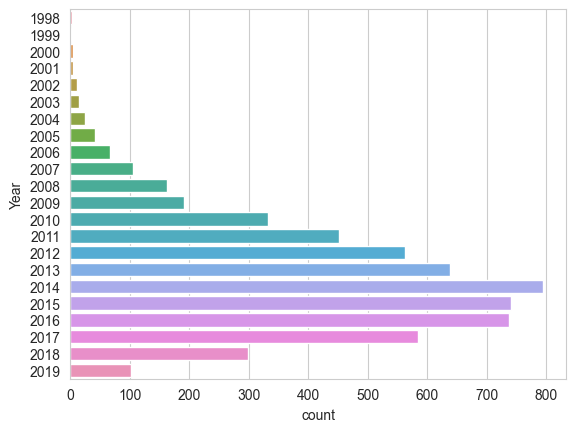

Fuel_Type
CNG           62
Diesel      3852
Electric       2
LPG           12
Petrol      3325
Name: Fuel_Type, dtype: int64


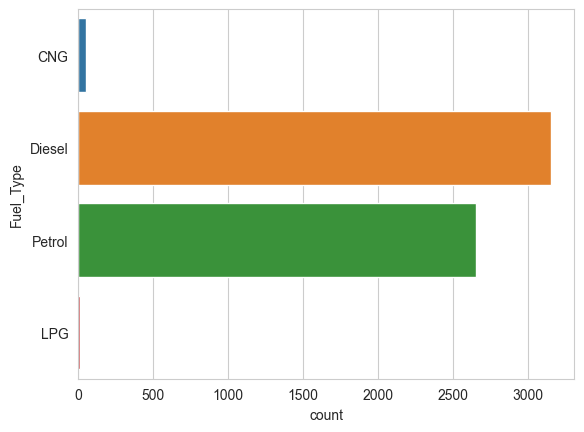

Transmission
Automatic    2049
Manual       5204
Name: Transmission, dtype: int64


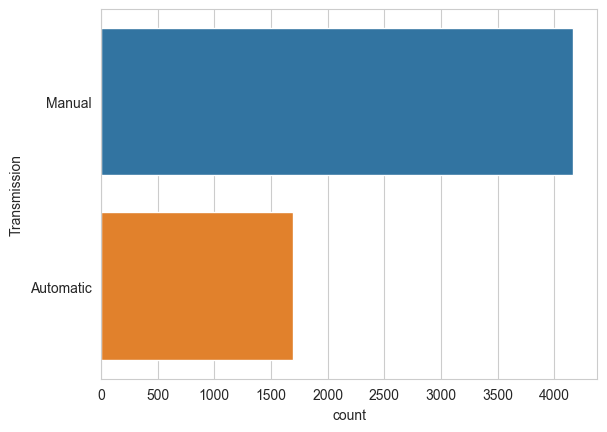

Owner_Type
First             5952
Fourth & Above      12
Second            1152
Third              137
Name: Owner_Type, dtype: int64


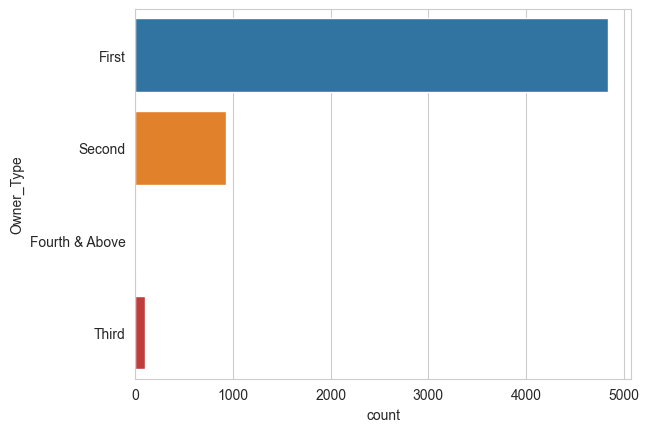

Kilometers_Driven


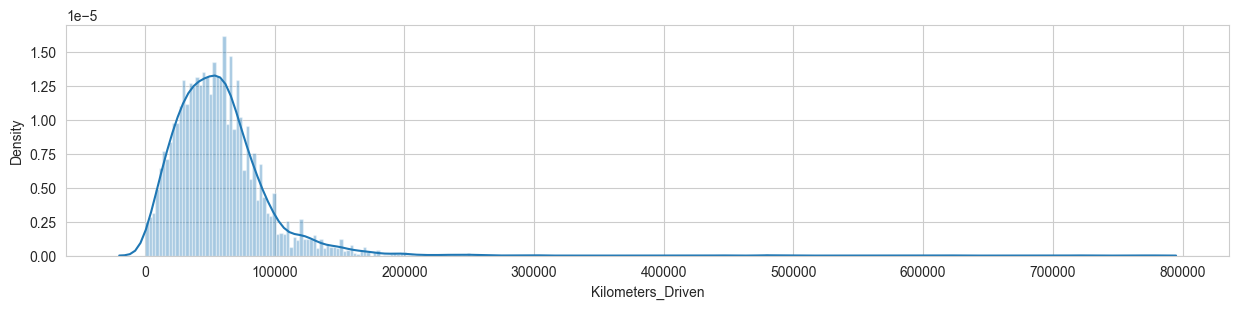

Mileage


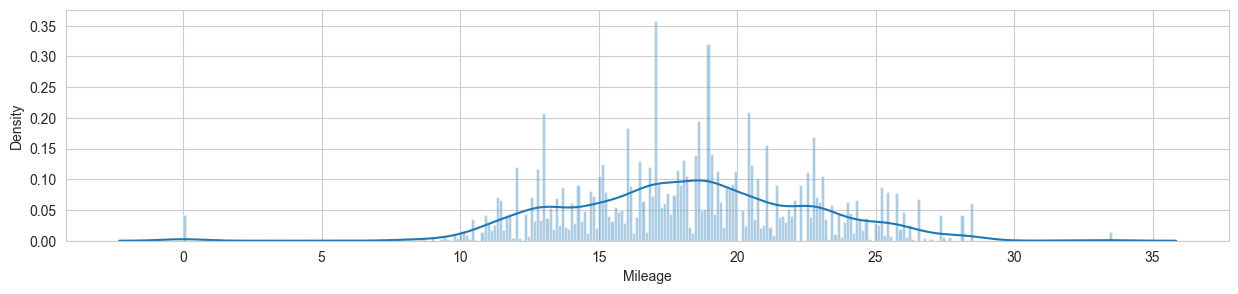

Engine


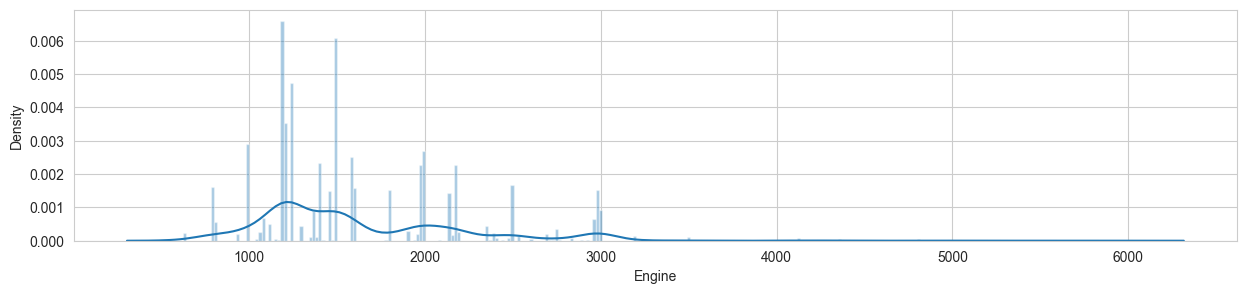

Power


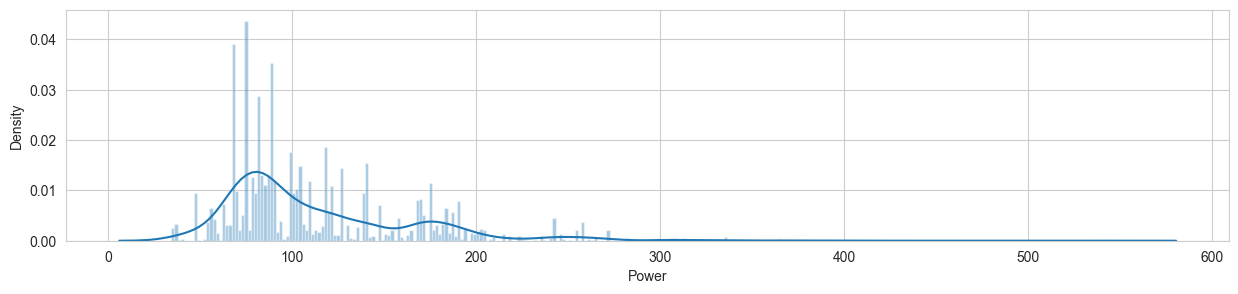

Seats


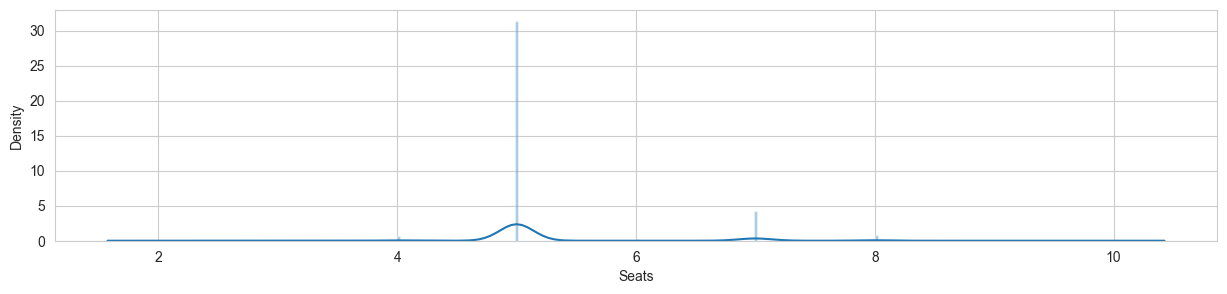

Location


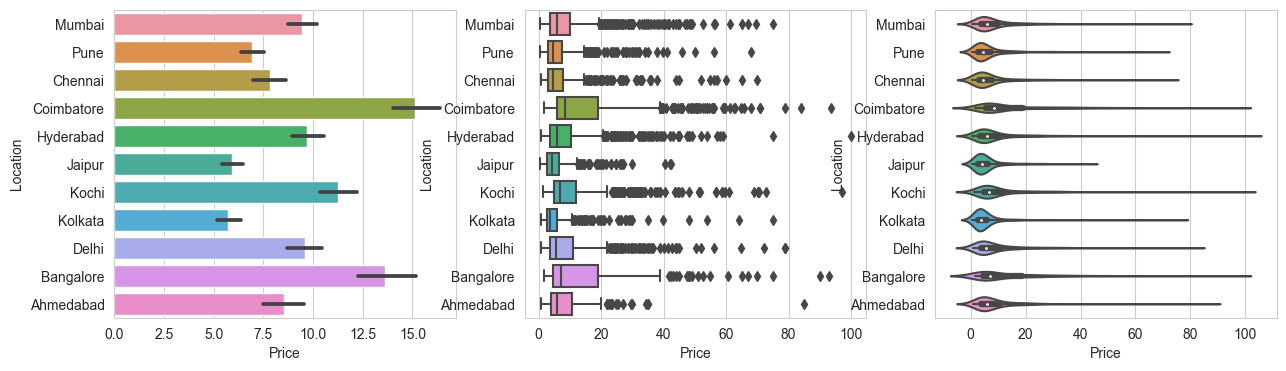

Year


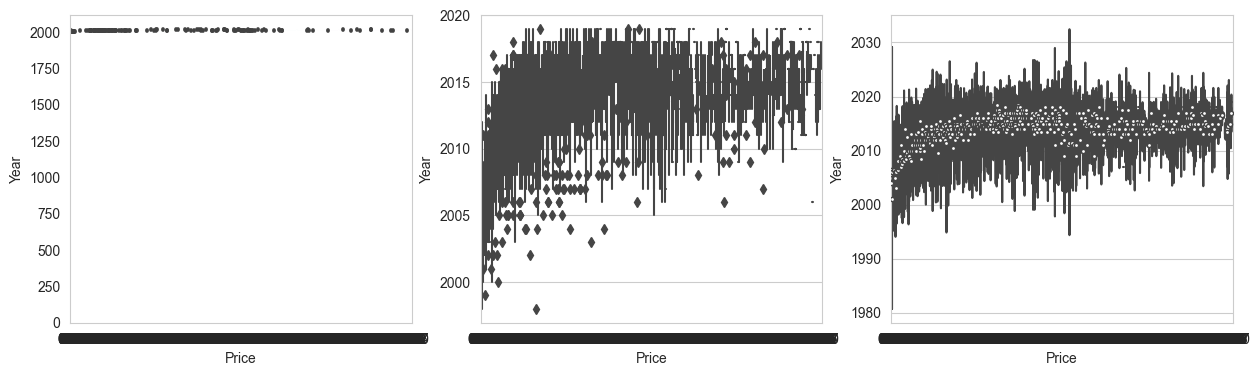

Fuel_Type


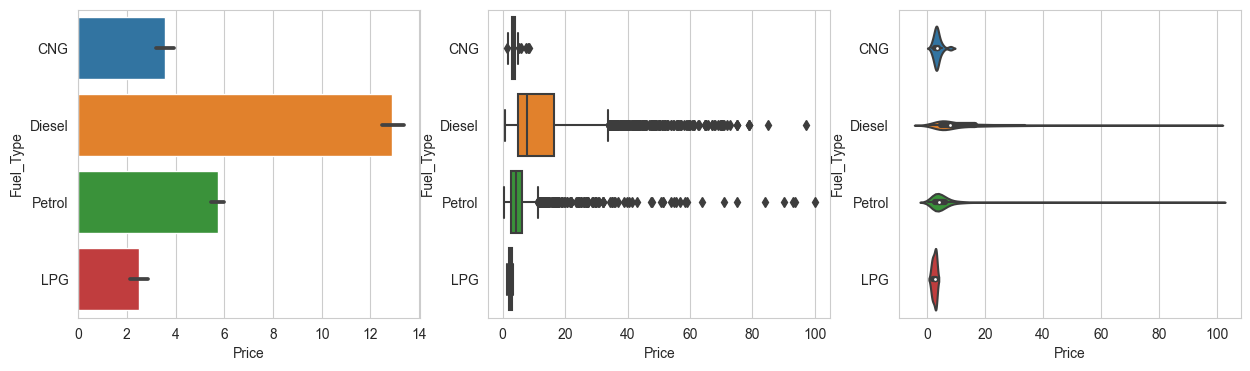

Transmission


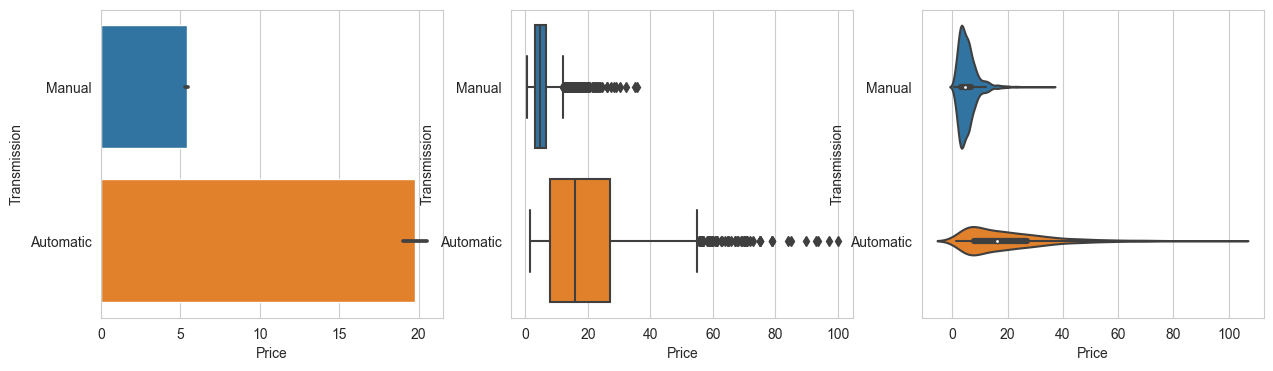

Owner_Type


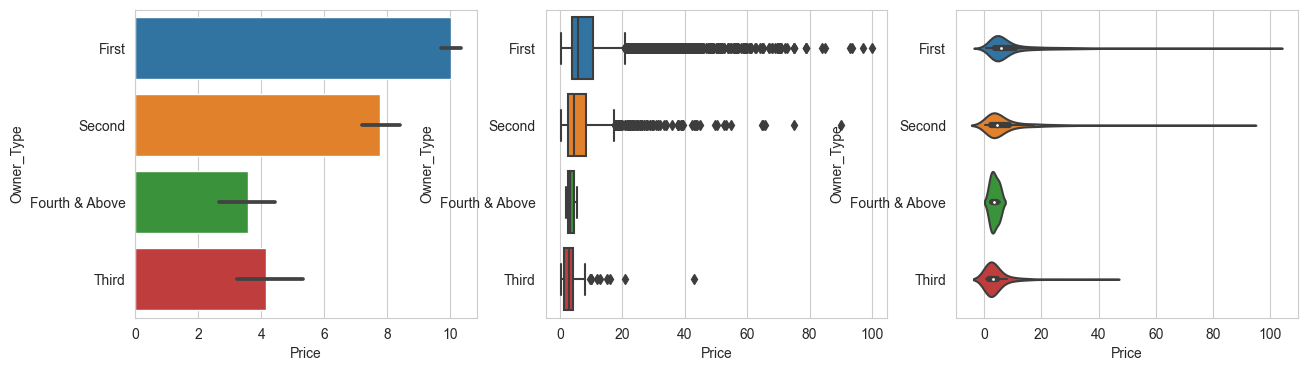

Kilometers_Driven


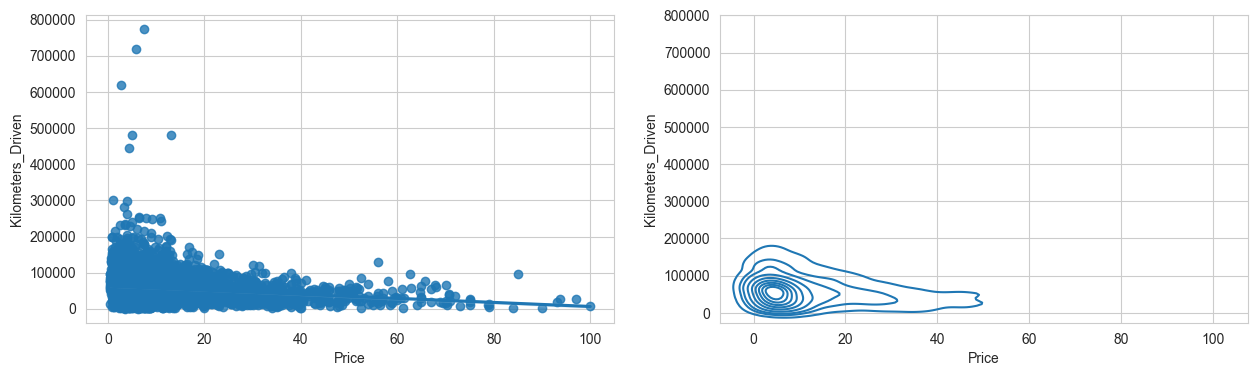

Mileage


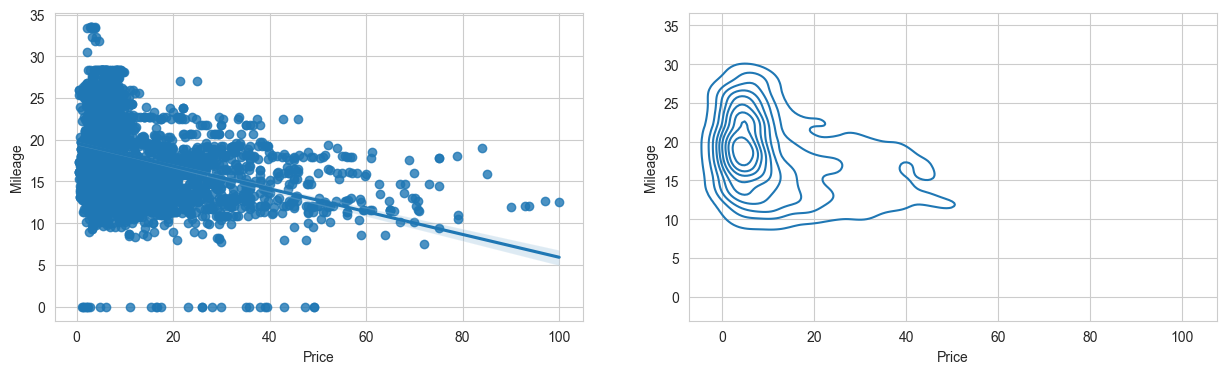

Engine


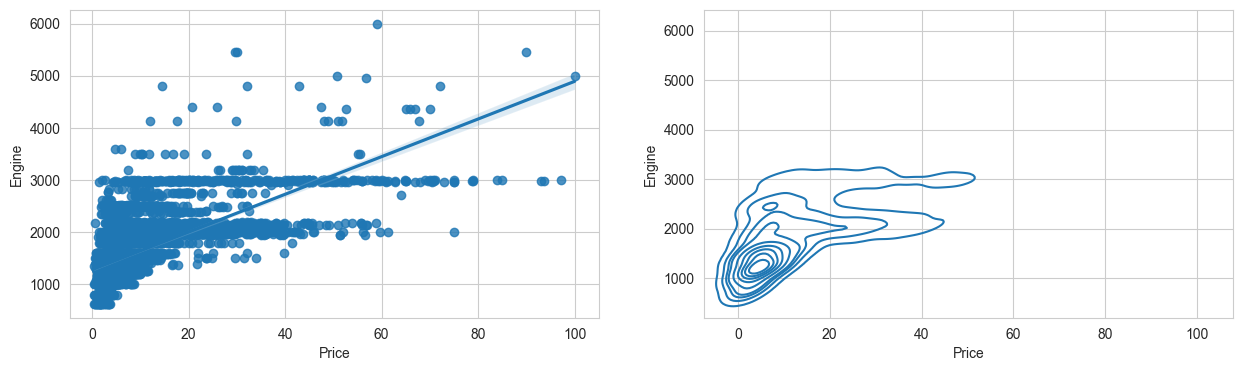

Power


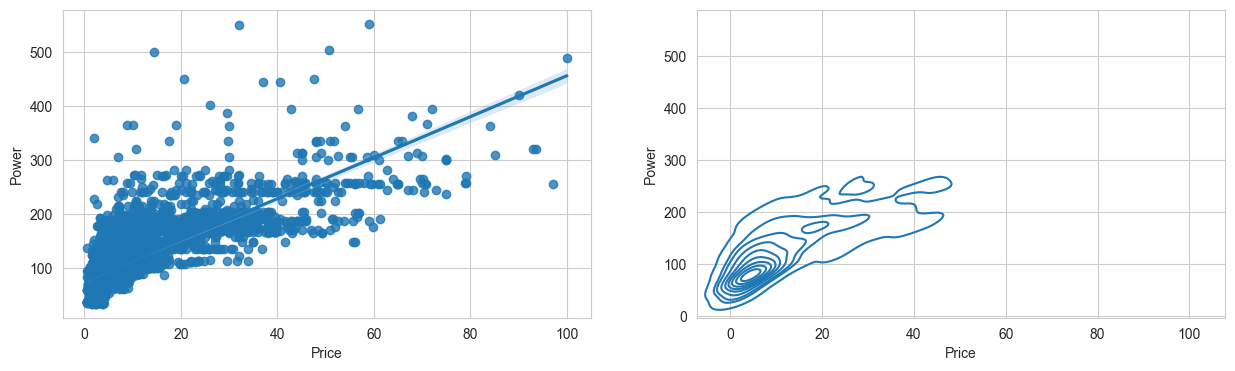

Seats


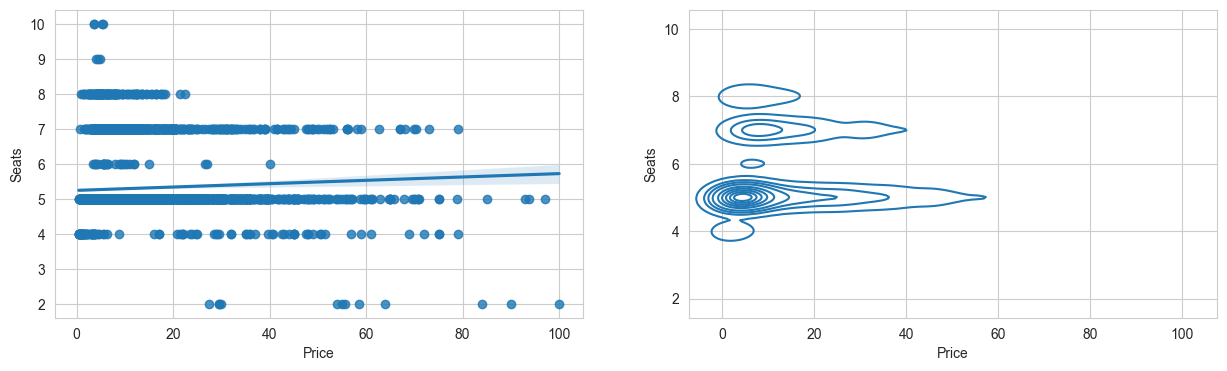

In [41]:
#Univariate Analysis

def cat_analyze(col):
    print(col)
    print(df[col].value_counts().sort_index())
    sns.countplot(data=cars,y=col)
    plt.show()
for col in cat_cols:
    cat_analyze(col)

def num_analyze(col):
    print(col)
    fig = plt.figure(figsize=(15,3))
    sns.distplot(cars[col],bins=300)
    plt.show()
for col in num_cols:
    num_analyze(col)

#Bivariate Analysis

def cat_bivariate(col):
    print(col)
    plt.figure(figsize=(15,4))
    plt.subplot(1,3,1)
    sns.barplot(data=cars,x=target_col,y=col)
    plt.subplot(1,3,2)
    sns.boxplot(data=cars,x=target_col,y=col)
    plt.subplot(1,3,3)
    sns.violinplot(data=cars,x=target_col,y=col)
    plt.show()
for col in cat_cols:
    cat_bivariate(col)

def num_bivariate(col):
    print(col)
    plt.figure(figsize=(15,4))
    plt.subplot(1,2,1)
    sns.regplot(data=cars,x=target_col,y=col)
    plt.subplot(1,2,2)
    sns.kdeplot(data=cars,x=target_col,y=col)
    plt.show()
for col in num_cols:
    num_bivariate(col)

# Multivariate Analysis

# for col in cat_cols:
#     if col == target_col:
#             continue
#     for ncol in num_cols:
#         plt.figure(figsize=(18,3))
#         plt.suptitle(f'{col} vs {ncol}')
#         plt.subplot(1,3,1)
#         sns.boxplot(data=cars,x=col,y=ncol,hue=target_col,palette=choice(p_list))
#         plt.subplot(1,3,2)
#         sns.violinplot(data=cars,x=col,y=ncol,hue=target_col,palette=choice(p_list))
#         plt.subplot(1,3,3)
#         sns.barplot(data=cars,x=col,y=ncol,hue=target_col,palette=choice(p_list))
#         plt.show()

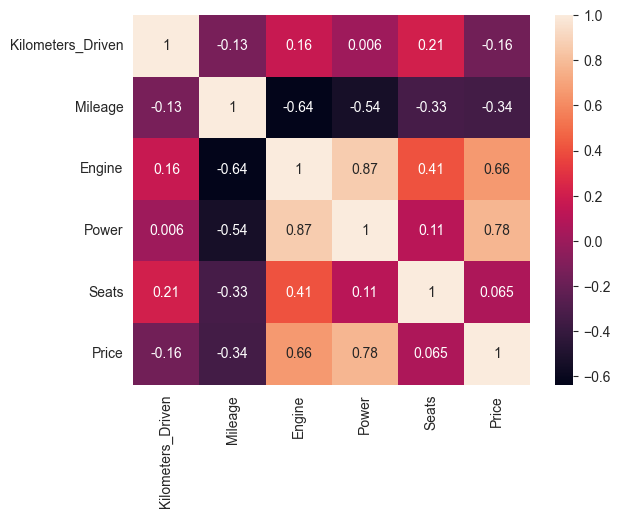

In [42]:
sns.heatmap(cars[num_cols + [target_col]].corr(),annot=True)
plt.show()

In [43]:
# based on analysis 
selected_cols = ['Power','Year','Location','Fuel_Type','Transmission','Owner_Type']

In [44]:
cars_df=cars[selected_cols+[target_col]]
cars_df.head()

,Power,Year,Location,Fuel_Type,Transmission,Owner_Type,Price
S.No.,,,,,,,
0,58.16,2010,Mumbai,CNG,Manual,First,1.75
1,126.20,2015,Pune,Diesel,Manual,First,12.50
2,88.70,2011,Chennai,Petrol,Manual,First,4.50
3,88.76,2012,Chennai,Diesel,Manual,First,6.00
4,140.80,2013,Coimbatore,Diesel,Automatic,Second,17.74


In [45]:
pd.get_dummies(cars_df).drop('Transmission_Automatic',axis=1)

,Power,Year,Price,Location_Ahmedabad,Location_Bangalore,Location_Chennai,Location_Coimbatore,Location_Delhi,Location_Hyderabad,Location_Jaipur,...,Location_Pune,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_LPG,Fuel_Type_Petrol,Transmission_Manual,Owner_Type_First,Owner_Type_Fourth & Above,Owner_Type_Second,Owner_Type_Third
S.No.,,,,,,,,,,,,,,,,,,,,,
0,58.16,2010,1.75,0,0,0,0,0,0,0,...,0,1,0,0,0,1,1,0,0,0
1,126.20,2015,12.50,0,0,0,0,0,0,0,...,1,0,1,0,0,1,1,0,0,0
2,88.70,2011,4.50,0,0,1,0,0,0,0,...,0,0,0,0,1,1,1,0,0,0
3,88.76,2012,6.00,0,0,1,0,0,0,0,...,0,0,1,0,0,1,1,0,0,0
4,140.80,2013,17.74,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6014,74.00,2014,4.75,0,0,0,0,1,0,0,...,0,0,1,0,0,1,1,0,0,0
6015,71.00,2015,4.00,0,0,0,0,0,0,1,...,0,0,1,0,0,1,1,0,0,0
6016,112.00,2012,2.90,0,0,0,0,0,0,1,...,0,0,1,0,0,1,0,0,1,0


In [46]:
cars_dummies = pd.get_dummies(cars_df).drop('Transmission_Automatic',axis=1)

In [47]:
features = cars_dummies.drop('Price',axis=1)
target = cars_dummies['Price']

In [48]:
from sklearn.preprocessing import PolynomialFeatures
feats_poly3 = PolynomialFeatures(degree=3).fit_transform(features)

In [49]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(features, target, test_size=0.25, random_state=101)
xtrainp,xtestp,ytrainp,ytestp = train_test_split(feats_poly3, target, test_size=0.25, random_state=101)

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

model_linear = LinearRegression().fit(xtrain,ytrain)
model_dt = DecisionTreeRegressor().fit(xtrain,ytrain)
model_rf = RandomForestRegressor().fit(xtrain,ytrain)
model_poly3 = LinearRegression().fit(xtrainp,ytrainp)

print('Linear Model:', round(100*model_linear.score(xtest,ytest)),'%')
print('DT Model:', round(100*model_dt.score(xtest,ytest)),'%')
print('RF Model:', round(100*model_rf.score(xtest,ytest)),'%')
print('Polynomial Deg3 Model:', round(100*model_poly3.score(xtrainp,ytrainp)),'%')

Linear Model: 71 %
DT Model: 85 %
RF Model: 90 %
Polynomial Deg3 Model: 88 %


In [50]:
print('Linear Model (Training):', round(100*model_linear.score(xtrain,ytrain)),'%')
print('DT Model (Training):', round(100*model_dt.score(xtrain,ytrain)),'%')
print('RF Model (Training):', round(100*model_rf.score(xtrain,ytrain)),'%')

Linear Model (Training): 72 %
DT Model (Training): 100 %
RF Model (Training): 98 %


In [51]:
# Elbow Method

scores = []
for i in range(1,5):    
    feats_i = PolynomialFeatures(degree=i).fit_transform(features)
    model_i = LinearRegression().fit(feats_i,target)
    scores.append(100 - round(100*model_i.score(feats_i,target)))

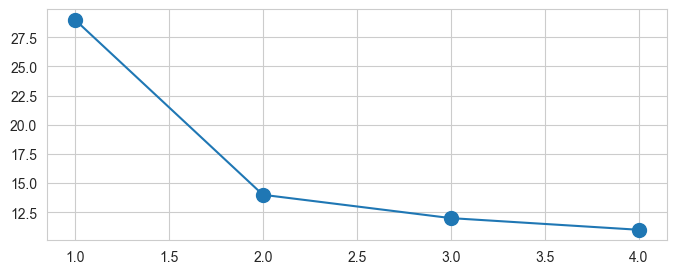

In [52]:
plt.figure(figsize=(8,3))
plt.plot(range(1,5), scores, marker='o', markersize=10)
plt.grid(True)
plt.show()